In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
#import plotly.express as px
#import plotly.graph_objects as go
#import plotly.io as pio
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score
import warnings
import statsmodels.api as sm
import pickle
warnings.filterwarnings("ignore")

C:\Users\Olaga\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
cir_1 = pd.read_csv("cirrhosis_24h_1_ATR-Diamond_KBr_MIR_DLaTGS_1.5cm-1.0.csv", sep = "\t")
cir_2 = pd.read_csv("cirrhosis_24h_2_ATR-Diamond_KBr_MIR_DLaTGS_1.5cm-1.0.csv", sep = "\t")
cir_3 = pd.read_csv("cirrhosis_24h_5_ATR-Diamond_KBr_MIR_DLaTGS_1.5cm-1.0.csv", sep = "\t")
cir_4 = pd.read_csv("cirrhosis_24h_6_ATR-Diamond_KBr_MIR_DLaTGS_1.5cm-1.0.csv", sep = "\t")
cir_5 = pd.read_csv("cirrhosis_24h_8_ATR-Diamond_KBr_MIR_DLaTGS_1.5cm-1.0.csv", sep = "\t")
cir_6 = pd.read_csv("cirrhosis_24h_9_ATR-Diamond_KBr_MIR_DLaTGS_1.5cm-1.0.csv", sep = "\t")
cir_7 = pd.read_csv("cirrhosis_24h_9_ns_ATR-Diamond_KBr_MIR_DLaTGS_1.5cm-1.0.csv", sep = "\t")
cir_8 = pd.read_csv("cirrhosis_48h_1_ATR-Diamond_KBr_MIR_DLaTGS_1.5cm-1.1.csv", sep = "\t")
cir_9 = pd.read_csv("cirrhosis_48h_2_ATR-Diamond_KBr_MIR_DLaTGS_1.5cm-1.0.csv", sep = "\t")
cir_10 = pd.read_csv("cirrhosis_48h_2_ATR-Diamond_KBr_MIR_DLaTGS_1.5cm-1.1.csv", sep = "\t")
cir_11 = pd.read_csv("cirrhosis_48h_4_ATR-Diamond_KBr_MIR_DLaTGS_1.5cm-1.0.csv", sep = "\t")
cir_12 = pd.read_csv("cirrhosis_48h_5_ATR-Diamond_KBr_MIR_DLaTGS_1.5cm-1.0.csv", sep = "\t")
cir_13 = pd.read_csv("cirrhosis_48h_6_ATR-Diamond_KBr_MIR_DLaTGS_1.5cm-1.0.csv", sep = "\t")
cir_14 = pd.read_csv("cirrhosis_48h_7_ATR-Diamond_KBr_MIR_DLaTGS_1.5cm-1.0.csv", sep = "\t")
cir_15 = pd.read_csv("cirrhosis_48h_8_ATR-Diamond_KBr_MIR_DLaTGS_1.5cm-1.0.csv", sep = "\t")
cir_16 = pd.read_csv("cirrhosis_48h_9_ATR-Diamond_KBr_MIR_DLaTGS_1.5cm-1.1.csv", sep = "\t")
cir_16

,1800.22456,-0.22846
0,1799.74245,-0.23316
1,1799.26033,-0.23508
2,1798.77821,-0.23467
3,1798.29609,-0.23471
4,1797.81398,-0.23894
...,...,...
2692,501.88371,-0.87585
2693,501.40159,-0.32317
2694,500.91948,0.26939
2695,500.43736,0.89279


In [3]:
cir_1 ,cir_2.iloc[:, 1] ,cir_3.iloc[:, 1] ,cir_4.iloc[:, 1],
cir_5.iloc[:, 1],cir_6.iloc[:, 1] ,cir_7.iloc[:, 1] ,cir_8.iloc[:, 1],
cir_9.iloc[:, 1] ,cir_10.iloc[:, 1], cir_11.iloc[:, 1] ,cir_12.iloc[:, 1],
cir_13.iloc[:, 1] ,cir_14.iloc[:, 1] ,cir_15.iloc[:, 1] ,cir_16.iloc[:, 1]

(0      -0.34900
 1      -0.35155
 2      -0.34800
 3      -0.34005
 4      -0.33107
          ...   
 2692    0.26303
 2693    0.34718
 2694    0.45535
 2695    0.59493
 2696    0.75981
 Name: -0.34105, Length: 2697, dtype: float64, 0      -0.06340
 1      -0.06602
 2      -0.07335
 3      -0.08699
 4      -0.10821
          ...   
 2692    3.57502
 2693    3.55034
 2694    3.57049
 2695    3.63249
 2696    3.71475
 Name: -0.06467, Length: 2697, dtype: float64, 0      -0.13693
 1      -0.15788
 2      -0.17721
 3      -0.19846
 4      -0.22480
          ...   
 2692    0.11762
 2693    0.23169
 2694    0.31588
 2695    0.37097
 2696    0.39332
 Name: -0.11363, Length: 2697, dtype: float64, 0      -0.23316
 1      -0.23508
 2      -0.23467
 3      -0.23471
 4      -0.23894
          ...   
 2692   -0.87585
 2693   -0.32317
 2694    0.26939
 2695    0.89279
 2696    1.51205
 Name: -0.22846, Length: 2697, dtype: float64)

In [4]:
contrls1 = pd.concat([cir_1 ,cir_2.iloc[:, 1] ,cir_3.iloc[:, 1] ,cir_4.iloc[:, 1],
cir_5.iloc[:, 1],cir_6.iloc[:, 1] ,cir_7.iloc[:, 1] ,cir_8.iloc[:, 1],
cir_9.iloc[:, 1] ,cir_10.iloc[:, 1], cir_11.iloc[:, 1] ,cir_12.iloc[:, 1],
cir_13.iloc[:, 1] ,cir_14.iloc[:, 1] ,cir_15.iloc[:, 1] ,cir_16.iloc[:, 1]], axis = 1)
contrls1.columns = ["wl", "cir_1", "cir_2", "cir_3", "cir_4", "cir_5", "cir_6",
                   "cir_7", "cir_8", "cir_9", "cir_10", "cir_11", "cir_12",
                   "cir_13", "cir_14", "cir_15", "cir_16"]
contrls1

,wl,cir_1,cir_2,cir_3,cir_4,cir_5,cir_6,cir_7,cir_8,cir_9,cir_10,cir_11,cir_12,cir_13,cir_14,cir_15,cir_16
0,1799.74245,-0.38658,-0.36037,-0.45648,-0.33678,-0.37129,-0.37491,-0.39730,-0.25062,-0.28595,-0.07213,-0.10727,-0.25522,-0.34900,-0.06340,-0.13693,-0.23316
1,1799.26033,-0.39229,-0.38438,-0.45895,-0.35572,-0.38090,-0.38854,-0.38520,-0.26970,-0.28465,-0.08309,-0.10962,-0.24660,-0.35155,-0.06602,-0.15788,-0.23508
2,1798.77821,-0.38468,-0.40421,-0.44889,-0.37528,-0.38359,-0.40122,-0.37942,-0.28741,-0.28196,-0.09563,-0.10863,-0.23779,-0.34800,-0.07335,-0.17721,-0.23467
3,1798.29609,-0.36498,-0.41936,-0.42556,-0.39008,-0.37752,-0.40944,-0.38001,-0.30293,-0.28165,-0.10720,-0.10812,-0.23138,-0.34005,-0.08699,-0.19846,-0.23471
4,1797.81398,-0.33844,-0.43060,-0.39425,-0.39777,-0.36500,-0.41087,-0.38494,-0.31631,-0.28532,-0.11812,-0.11190,-0.22883,-0.33107,-0.10821,-0.22480,-0.23894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2692,501.88371,-0.00158,0.13698,0.53876,-0.29357,1.53202,-0.19435,3.71765,-0.71950,2.13140,-0.48786,4.17190,1.16063,0.26303,3.57502,0.11762,-0.87585
2693,501.40159,0.08077,0.22933,0.61777,-0.36709,1.53086,-0.10266,3.65854,-0.46629,2.17780,-0.54585,3.99471,1.16418,0.34718,3.55034,0.23169,-0.32317
2694,500.91948,0.12436,0.27550,0.65423,-0.44860,1.57148,-0.00080,3.61938,-0.14429,2.23054,-0.61026,3.82903,1.17532,0.45535,3.57049,0.31588,0.26939
2695,500.43736,0.15438,0.25805,0.65517,-0.52236,1.64156,0.11507,3.60694,0.20782,2.28962,-0.61817,3.66921,1.18686,0.59493,3.63249,0.37097,0.89279


In [5]:
cirrhosis_final = contrls1.copy()
cirrhosis_final

,wl,cir_1,cir_2,cir_3,cir_4,cir_5,cir_6,cir_7,cir_8,cir_9,cir_10,cir_11,cir_12,cir_13,cir_14,cir_15,cir_16
0,1799.74245,-0.38658,-0.36037,-0.45648,-0.33678,-0.37129,-0.37491,-0.39730,-0.25062,-0.28595,-0.07213,-0.10727,-0.25522,-0.34900,-0.06340,-0.13693,-0.23316
1,1799.26033,-0.39229,-0.38438,-0.45895,-0.35572,-0.38090,-0.38854,-0.38520,-0.26970,-0.28465,-0.08309,-0.10962,-0.24660,-0.35155,-0.06602,-0.15788,-0.23508
2,1798.77821,-0.38468,-0.40421,-0.44889,-0.37528,-0.38359,-0.40122,-0.37942,-0.28741,-0.28196,-0.09563,-0.10863,-0.23779,-0.34800,-0.07335,-0.17721,-0.23467
3,1798.29609,-0.36498,-0.41936,-0.42556,-0.39008,-0.37752,-0.40944,-0.38001,-0.30293,-0.28165,-0.10720,-0.10812,-0.23138,-0.34005,-0.08699,-0.19846,-0.23471
4,1797.81398,-0.33844,-0.43060,-0.39425,-0.39777,-0.36500,-0.41087,-0.38494,-0.31631,-0.28532,-0.11812,-0.11190,-0.22883,-0.33107,-0.10821,-0.22480,-0.23894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2692,501.88371,-0.00158,0.13698,0.53876,-0.29357,1.53202,-0.19435,3.71765,-0.71950,2.13140,-0.48786,4.17190,1.16063,0.26303,3.57502,0.11762,-0.87585
2693,501.40159,0.08077,0.22933,0.61777,-0.36709,1.53086,-0.10266,3.65854,-0.46629,2.17780,-0.54585,3.99471,1.16418,0.34718,3.55034,0.23169,-0.32317
2694,500.91948,0.12436,0.27550,0.65423,-0.44860,1.57148,-0.00080,3.61938,-0.14429,2.23054,-0.61026,3.82903,1.17532,0.45535,3.57049,0.31588,0.26939
2695,500.43736,0.15438,0.25805,0.65517,-0.52236,1.64156,0.11507,3.60694,0.20782,2.28962,-0.61817,3.66921,1.18686,0.59493,3.63249,0.37097,0.89279


In [6]:
cirrhosis_final.columns

Index(['wl', 'cir_1', 'cir_2', 'cir_3', 'cir_4', 'cir_5', 'cir_6', 'cir_7',
       'cir_8', 'cir_9', 'cir_10', 'cir_11', 'cir_12', 'cir_13', 'cir_14',
       'cir_15', 'cir_16'],
      dtype='object')

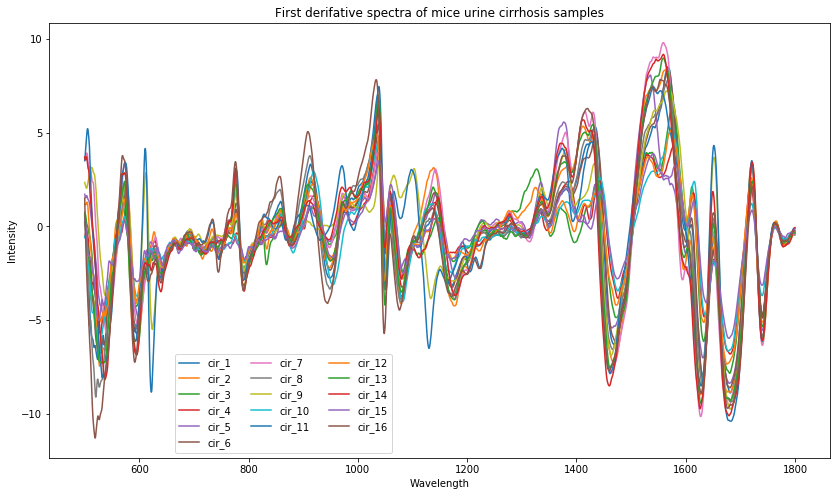

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

x_col = "wl"
y_cols = ['cir_1', 'cir_2', 'cir_3', 'cir_4', 'cir_5', 'cir_6', 'cir_7',
       'cir_8', 'cir_9', 'cir_10', 'cir_11', 'cir_12', 'cir_13', 'cir_14',
       'cir_15', 'cir_16']

fig, ax = plt.subplots(figsize=(14,8))

for i, col in enumerate(y_cols):
    ax.plot(cirrhosis_final[x_col], cirrhosis_final[col], label=col)

ax.set_title("First derifative spectra of mice urine cirrhosis samples")
ax.legend(ncol=3, loc='upper center', bbox_to_anchor=(0.3, 0.25))
ax.set_xlabel("Wavelength")
ax.set_ylabel("Intensity")

plt.show()


In [9]:
cirrhosis_final2 = cirrhosis_final.copy()
cirrhosis_final2 = cirrhosis_final2.set_index("wl")
cirrhosis_final2.T

wl,1799.74245,1799.26033,1798.77821,1798.29609,1797.81398,1797.33186,1796.84974,1796.36763,1795.88551,1795.40339,...,504.29429,503.81218,503.33006,502.84794,502.36583,501.88371,501.40159,500.91948,500.43736,499.95524
cir_1,-0.38658,-0.39229,-0.38468,-0.36498,-0.33844,-0.31264,-0.29492,-0.28977,-0.29727,-0.31357,...,-0.86706,-0.69803,-0.50535,-0.30824,-0.13338,-0.00158,0.08077,0.12436,0.15438,0.20449
cir_2,-0.36037,-0.38438,-0.40421,-0.41936,-0.43060,-0.43933,-0.44708,-0.45572,-0.46741,-0.48408,...,-0.46841,-0.31130,-0.18831,-0.08066,0.02744,0.13698,0.22933,0.27550,0.25805,0.19262
cir_3,-0.45648,-0.45895,-0.44889,-0.42556,-0.39425,-0.36430,-0.34430,-0.33743,-0.33992,-0.34369,...,0.08288,0.12432,0.19948,0.30611,0.42741,0.53876,0.61777,0.65423,0.65517,0.64142
cir_4,-0.33678,-0.35572,-0.37528,-0.39008,-0.39777,-0.40039,-0.40258,-0.40800,-0.41664,-0.42487,...,-0.32250,-0.25841,-0.21743,-0.21059,-0.23835,-0.29357,-0.36709,-0.44860,-0.52236,-0.56467
cir_5,-0.37129,-0.38090,-0.38359,-0.37752,-0.36500,-0.35160,-0.34286,-0.34088,-0.34317,-0.34455,...,1.60903,1.64200,1.64397,1.61389,1.56760,1.53202,1.53086,1.57148,1.64156,1.71724
cir_6,-0.37491,-0.38854,-0.40122,-0.40944,-0.41087,-0.40630,-0.39965,-0.39611,-0.39921,-0.40899,...,-0.77854,-0.60820,-0.47280,-0.36806,-0.27997,-0.19435,-0.10266,-0.00080,0.11507,0.24865
cir_7,-0.39730,-0.38520,-0.37942,-0.38001,-0.38494,-0.39237,-0.40183,-0.41361,-0.42703,-0.43959,...,3.90154,3.91949,3.89777,3.84909,3.78522,3.71765,3.65854,3.61938,3.60694,3.61925
cir_8,-0.25062,-0.26970,-0.28741,-0.30293,-0.31631,-0.32866,-0.34248,-0.36119,-0.38781,-0.42318,...,-1.47079,-1.22688,-1.08595,-0.99479,-0.88931,-0.71950,-0.46629,-0.14429,0.20782,0.54243
cir_9,-0.28595,-0.28465,-0.28196,-0.28165,-0.28532,-0.29129,-0.29634,-0.29893,-0.30127,-0.30858,...,2.08887,2.04808,2.03899,2.05631,2.08995,2.13140,2.17780,2.23054,2.28962,2.34795
cir_10,-0.07213,-0.08309,-0.09563,-0.10720,-0.11812,-0.13061,-0.14719,-0.16953,-0.19822,-0.23290,...,-1.22783,-1.00388,-0.77938,-0.59659,-0.49537,-0.48786,-0.54585,-0.61026,-0.61817,-0.53120


In [10]:
cirrhosis_final_classes = cirrhosis_final2.T
cirrhosis_final_classes

wl,1799.74245,1799.26033,1798.77821,1798.29609,1797.81398,1797.33186,1796.84974,1796.36763,1795.88551,1795.40339,...,504.29429,503.81218,503.33006,502.84794,502.36583,501.88371,501.40159,500.91948,500.43736,499.95524
cir_1,-0.38658,-0.39229,-0.38468,-0.36498,-0.33844,-0.31264,-0.29492,-0.28977,-0.29727,-0.31357,...,-0.86706,-0.69803,-0.50535,-0.30824,-0.13338,-0.00158,0.08077,0.12436,0.15438,0.20449
cir_2,-0.36037,-0.38438,-0.40421,-0.41936,-0.43060,-0.43933,-0.44708,-0.45572,-0.46741,-0.48408,...,-0.46841,-0.31130,-0.18831,-0.08066,0.02744,0.13698,0.22933,0.27550,0.25805,0.19262
cir_3,-0.45648,-0.45895,-0.44889,-0.42556,-0.39425,-0.36430,-0.34430,-0.33743,-0.33992,-0.34369,...,0.08288,0.12432,0.19948,0.30611,0.42741,0.53876,0.61777,0.65423,0.65517,0.64142
cir_4,-0.33678,-0.35572,-0.37528,-0.39008,-0.39777,-0.40039,-0.40258,-0.40800,-0.41664,-0.42487,...,-0.32250,-0.25841,-0.21743,-0.21059,-0.23835,-0.29357,-0.36709,-0.44860,-0.52236,-0.56467
cir_5,-0.37129,-0.38090,-0.38359,-0.37752,-0.36500,-0.35160,-0.34286,-0.34088,-0.34317,-0.34455,...,1.60903,1.64200,1.64397,1.61389,1.56760,1.53202,1.53086,1.57148,1.64156,1.71724
cir_6,-0.37491,-0.38854,-0.40122,-0.40944,-0.41087,-0.40630,-0.39965,-0.39611,-0.39921,-0.40899,...,-0.77854,-0.60820,-0.47280,-0.36806,-0.27997,-0.19435,-0.10266,-0.00080,0.11507,0.24865
cir_7,-0.39730,-0.38520,-0.37942,-0.38001,-0.38494,-0.39237,-0.40183,-0.41361,-0.42703,-0.43959,...,3.90154,3.91949,3.89777,3.84909,3.78522,3.71765,3.65854,3.61938,3.60694,3.61925
cir_8,-0.25062,-0.26970,-0.28741,-0.30293,-0.31631,-0.32866,-0.34248,-0.36119,-0.38781,-0.42318,...,-1.47079,-1.22688,-1.08595,-0.99479,-0.88931,-0.71950,-0.46629,-0.14429,0.20782,0.54243
cir_9,-0.28595,-0.28465,-0.28196,-0.28165,-0.28532,-0.29129,-0.29634,-0.29893,-0.30127,-0.30858,...,2.08887,2.04808,2.03899,2.05631,2.08995,2.13140,2.17780,2.23054,2.28962,2.34795
cir_10,-0.07213,-0.08309,-0.09563,-0.10720,-0.11812,-0.13061,-0.14719,-0.16953,-0.19822,-0.23290,...,-1.22783,-1.00388,-0.77938,-0.59659,-0.49537,-0.48786,-0.54585,-0.61026,-0.61817,-0.53120


In [11]:
cirrhosis_final_classes["class"] = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
cirrhosis_final_classes

wl,1799.74245,1799.26033,1798.77821,1798.29609,1797.81398,1797.33186,1796.84974,1796.36763,1795.88551,1795.40339,...,503.81218,503.33006,502.84794,502.36583,501.88371,501.40159,500.91948,500.43736,499.95524,class
cir_1,-0.38658,-0.39229,-0.38468,-0.36498,-0.33844,-0.31264,-0.29492,-0.28977,-0.29727,-0.31357,...,-0.69803,-0.50535,-0.30824,-0.13338,-0.00158,0.08077,0.12436,0.15438,0.20449,1
cir_2,-0.36037,-0.38438,-0.40421,-0.41936,-0.43060,-0.43933,-0.44708,-0.45572,-0.46741,-0.48408,...,-0.31130,-0.18831,-0.08066,0.02744,0.13698,0.22933,0.27550,0.25805,0.19262,1
cir_3,-0.45648,-0.45895,-0.44889,-0.42556,-0.39425,-0.36430,-0.34430,-0.33743,-0.33992,-0.34369,...,0.12432,0.19948,0.30611,0.42741,0.53876,0.61777,0.65423,0.65517,0.64142,1
cir_4,-0.33678,-0.35572,-0.37528,-0.39008,-0.39777,-0.40039,-0.40258,-0.40800,-0.41664,-0.42487,...,-0.25841,-0.21743,-0.21059,-0.23835,-0.29357,-0.36709,-0.44860,-0.52236,-0.56467,1
cir_5,-0.37129,-0.38090,-0.38359,-0.37752,-0.36500,-0.35160,-0.34286,-0.34088,-0.34317,-0.34455,...,1.64200,1.64397,1.61389,1.56760,1.53202,1.53086,1.57148,1.64156,1.71724,1
cir_6,-0.37491,-0.38854,-0.40122,-0.40944,-0.41087,-0.40630,-0.39965,-0.39611,-0.39921,-0.40899,...,-0.60820,-0.47280,-0.36806,-0.27997,-0.19435,-0.10266,-0.00080,0.11507,0.24865,1
cir_7,-0.39730,-0.38520,-0.37942,-0.38001,-0.38494,-0.39237,-0.40183,-0.41361,-0.42703,-0.43959,...,3.91949,3.89777,3.84909,3.78522,3.71765,3.65854,3.61938,3.60694,3.61925,1
cir_8,-0.25062,-0.26970,-0.28741,-0.30293,-0.31631,-0.32866,-0.34248,-0.36119,-0.38781,-0.42318,...,-1.22688,-1.08595,-0.99479,-0.88931,-0.71950,-0.46629,-0.14429,0.20782,0.54243,1
cir_9,-0.28595,-0.28465,-0.28196,-0.28165,-0.28532,-0.29129,-0.29634,-0.29893,-0.30127,-0.30858,...,2.04808,2.03899,2.05631,2.08995,2.13140,2.17780,2.23054,2.28962,2.34795,1
cir_10,-0.07213,-0.08309,-0.09563,-0.10720,-0.11812,-0.13061,-0.14719,-0.16953,-0.19822,-0.23290,...,-1.00388,-0.77938,-0.59659,-0.49537,-0.48786,-0.54585,-0.61026,-0.61817,-0.53120,1


In [46]:
import numpy as np
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np

class GlobalStandardScaler(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        self.mean_ = np.mean(X)
        self.std_ = np.std(X)
        return self
    
    def transform(self, X, y=None):
        return (X - self.mean_) / self.std_

In [44]:
control = pd.read_csv("control_classes.csv").set_index("Unnamed: 0")
cirrhosis = pd.read_csv("cirrhosis_classes.csv").set_index("Unnamed: 0")
df = pd.concat([control, cirrhosis.iloc[:14,]])
df

,1799.26033,1798.29609,1797.33186,1796.36763,1795.40339,1794.43916,1793.47493,1792.51069,1791.54646,1790.58222,...,504.29429000000005,503.81217999999996,503.33005999999995,502.84794000000005,502.36582999999996,501.88370999999995,501.40159000000006,500.91947999999996,500.43735999999996,499.95524000000006
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
ctrl_1,-0.23006,-0.26366,-0.29761,-0.32003,-0.33349,-0.34939,-0.35997,-0.37394,-0.39000,-0.39583,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ctrl_2,-0.19690,-0.22245,-0.25579,-0.28517,-0.30822,-0.32742,-0.34588,-0.36933,-0.39428,-0.41626,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ctrl_11,-0.27935,-0.30611,-0.33367,-0.35717,-0.37346,-0.39223,-0.41316,-0.43547,-0.46375,-0.49943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ctrl_111,0.06284,0.02971,-0.00701,-0.04202,-0.07472,-0.10329,-0.12321,-0.14043,-0.15339,-0.16425,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ctrl_21,-0.17953,-0.19587,-0.21603,-0.24021,-0.26934,-0.29351,-0.30739,-0.33128,-0.35929,-0.38486,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ctrl_m1,-0.22245,-0.28167,-0.41302,-0.46391,-0.44058,-0.51301,-0.56203,-0.55365,-0.67505,-0.74633,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ctrl_m2,-0.52157,-0.42872,-0.33528,-0.24845,-0.26475,-0.39435,-0.46841,-0.52111,-0.65778,-0.71397,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ctrl_m3,-0.18542,-0.17384,-0.27978,-0.38773,-0.26256,-0.28424,-0.46415,-0.40831,-0.53172,-0.56637,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ctrl3,-0.52639,-0.53223,-0.48428,-0.43926,-0.44449,-0.48667,-0.55250,-0.64926,-0.76270,-0.85972,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
df = df.dropna(axis=1)
df

,1799.26033,1796.36763,1795.40339,1793.47493,1790.58222,1789.61799,1787.68952,1785.76105,1784.79682,1782.86835,...,513.93663,512.9724,512.00816,511.04393,510.0797,509.11546,508.15123,507.187,505.25853,class
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
ctrl_1,-0.23006,-0.32003,-0.33349,-0.35997,-0.39583,-0.41239,-0.44256,-0.45673,-0.45378,-0.44103,...,-2.44235,-2.11251,-1.73383,-1.40656,-1.40656,-1.40656,-1.40656,-1.40656,-1.40656,0
ctrl_2,-0.19690,-0.28517,-0.30822,-0.34588,-0.41626,-0.44173,-0.50273,-0.54700,-0.56472,-0.55915,...,-3.88559,-3.66379,-3.42956,-3.21158,-3.21158,-3.21158,-3.21158,-3.21158,-3.21158,0
ctrl_11,-0.27935,-0.35717,-0.37346,-0.41316,-0.49943,-0.53847,-0.58736,-0.64382,-0.65170,-0.64012,...,-4.35115,-3.97924,-3.59589,-3.23461,-3.23461,-3.23461,-3.23461,-3.23461,-3.23461,0
ctrl_111,0.06284,-0.04202,-0.07472,-0.12321,-0.16425,-0.17884,-0.18316,-0.20518,-0.22615,-0.26684,...,-3.08623,-2.84583,-2.54623,-2.25652,-2.25652,-2.25652,-2.25652,-2.25652,-2.25652,0
ctrl_21,-0.17953,-0.24021,-0.26934,-0.30739,-0.38486,-0.41947,-0.47842,-0.52993,-0.53757,-0.52923,...,-1.78617,-1.60860,-1.44506,-1.26293,-1.26293,-1.26293,-1.26293,-1.26293,-1.26293,0
ctrl_m1,-0.22245,-0.46391,-0.44058,-0.56203,-0.74633,-0.65086,-0.41738,-0.29973,-0.24874,-0.58009,...,-8.71664,-4.00884,-0.35046,0.18456,-1.37934,-3.31126,-4.98940,-3.44932,0.98798,0
ctrl_m2,-0.52157,-0.24845,-0.26475,-0.46841,-0.71397,-0.73684,-0.44472,-0.53257,-0.54611,-0.61453,...,-6.52905,-5.99385,-4.14187,-2.29309,-2.12267,-0.77248,-0.19563,-0.69334,0.93904,0
ctrl_m3,-0.18542,-0.38773,-0.26256,-0.46415,-0.56637,-0.42198,-0.06037,-0.08840,-0.26900,-0.65078,...,-5.37656,-3.75116,-3.98012,-3.42153,-3.24783,-3.33697,-2.61913,-1.91454,-0.94135,0
ctrl3,-0.52639,-0.43926,-0.44449,-0.55250,-0.85972,-0.92144,-0.95710,-0.90884,-0.87305,-0.82217,...,-2.20133,-1.92394,-1.47349,-1.00136,-0.51233,0.06615,0.62079,0.99218,1.22638,0


In [48]:
X,y = df.iloc[:,:-1], df.iloc[:,-1]
scaler = GlobalStandardScaler()
X = scaler.fit_transform(X)

In [49]:
import numpy as np
import pandas as pd

# Expand dataset, Function also available in ChemUtils
def dataaugment(x, betashift=0.05, slopeshift=0.05, multishift=0.05):
    # Shift of baseline
    # Calculate arrays
    beta = np.random.random(size=(x.shape[0], 1)) * 2 * betashift - betashift
    slope = np.random.random(size=(x.shape[0], 1)) * 2 * slopeshift - slopeshift + 1
    # Calculate relative position
    axis = np.array(range(x.shape[1])) / float(x.shape[1])
    # Calculate offset to be added
    offset = slope * (axis) + beta - axis - slope / 2. + 0.5

    # Multiplicative
    multi = np.random.random(size=(x.shape[0], 1)) * 2 * multishift - multishift + 1

    x = multi * x + offset

    return x

X_train = X.reset_index(drop=True)
shift = np.std(X_train) * 0.1
X_train_aug = pd.DataFrame(np.repeat(X_train.to_numpy(), repeats=20, axis=0))
X_train_aug.index = np.arange(len(X_train_aug))
X_train_aug = dataaugment(X_train_aug, betashift=0.1, slopeshift=0.05, multishift=0.1)
X_train_aug = pd.DataFrame(X_train_aug)

y_train_aug = np.repeat(y.to_numpy(), repeats=20, axis=0)
y_train_aug = pd.DataFrame(y_train_aug)

print(X_train_aug.shape)  # should be (7700, 741)
print(y_train_aug.shape)


(560, 1006)
(560, 1)


In [69]:
y_train_aug.iloc[:, 0].unique()

array([0, 1], dtype=int64)

In [61]:
from sklearn.model_selection import cross_val_predict

In [73]:
X = X_train_aug.values
y = y_train_aug.values  

classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(probability=True)]

classifier_names = [
    'Logistic Regression',
    'KNN',
    'Decision Tree',
    'Random Forest',
    'SVM']

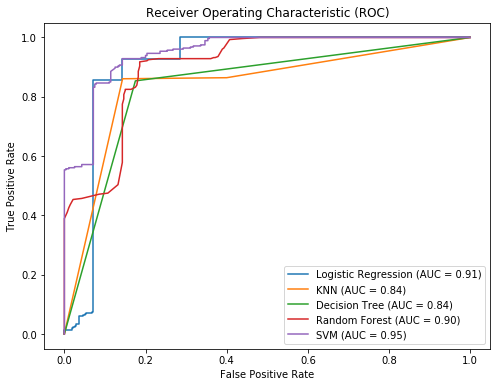

In [72]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_binary = label_encoder.fit_transform(y)

# Convert y to binary labels if needed
#y_binary = np.where(y == 'positive', 1, 0)

# Initialize the figure
plt.figure(figsize=(8, 6))

# Create a StratifiedKFold object
skf = StratifiedKFold(n_splits=5)

for clf, clf_name in zip(classifiers, classifier_names):
    y_scores = cross_val_predict(clf, X, y_binary, cv=skf, method='predict_proba')[:, 1]
    fpr, tpr, thresholds = roc_curve(y_binary, y_scores)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{clf_name} (AUC = {roc_auc:.2f})')

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')

# Show the plot
plt.show()


In [83]:
from sklearn.feature_selection import SelectKBest, f_classif

k_features = 80
selector = SelectKBest(score_func=f_classif, k=k_features)
X_train_aug_selected = selector.fit_transform(X_train_aug, y_train_aug)

selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = X_train_aug.columns[selected_feature_indices]
selected_feature_names = list(df.columns[selected_feature_indices])
print("Selected feature column names:")
for feature_name in selected_feature_names:
    print(feature_name)

Selected feature column names:
1787.68952
1785.76105
1784.79682
1782.86835
1781.90412
1779.97565
1778.04718
1777.08295
1776.11872
1774.19025
1747.1917
1745.26323
1744.299
1743.33477
1741.4063
1740.44206
1739.47783
1738.5136
1735.6209
1734.65666
1733.69243
1729.83549
1722.12162
1720.19315
1719.22892
1717.30045
1716.33622
1714.40775
1713.44352
1712.47928
1711.51505
1710.55082
1497.45514
1496.49091
1495.52667
1494.56244
1493.5982
1491.66974
1490.7055
1489.74127
1488.77703
1398.13905
1397.17482
1395.24635
1050.05064
1049.08641
1047.15794
1046.19371
1045.22947
1038.47984
1037.5156
1036.55137
1034.6229
930.48565
929.52141
816.70605
737.63888
736.67465
707.74763
706.7834
705.81916
704.85493
703.8907
692.31989
691.35566
685.57025
683.64179
682.67755
666.28558
644.1082
643.14397
642.17973
585.28994
584.3257
583.36147
582.39723
581.433
578.5403
577.57606
553.47022


selected features: 584.3 cm-1, 1036.5 cm-1, 1348.96 cm-1,1730.9 

In [115]:
X_selected = pd.concat([X_train_aug.iloc[:, 40], X_train_aug.iloc[:, 334], 
                        X_train_aug.iloc[:, 603], X_train_aug.iloc[:, 943]], axis = 1)
X_selected

,40,334,603,943
0,1.944136,0.695243,-0.190136,-0.362909
1,1.951376,0.717663,-0.159933,-0.345329
2,1.721884,0.513814,-0.345060,-0.524222
3,1.826930,0.604793,-0.263485,-0.441784
4,2.028686,0.729341,-0.194145,-0.385461
...,...,...,...,...
555,-1.064926,1.290530,1.498979,-0.565103
556,-0.974257,1.208266,1.401664,-0.510254
557,-0.911773,1.131902,1.304722,-0.505912
558,-0.961985,1.164905,1.353777,-0.508412


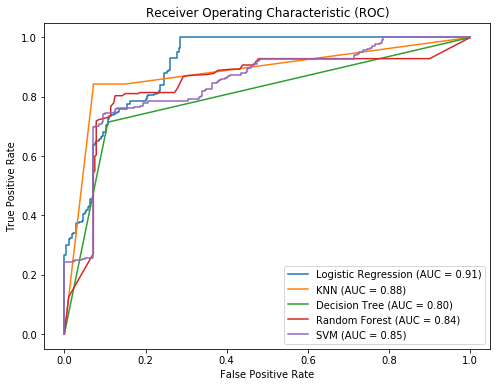

In [116]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_binary = label_encoder.fit_transform(y)

#y_binary = np.where(y == 'positive', 1, 0)

plt.figure(figsize=(8, 6))

skf = StratifiedKFold(n_splits=5)

for clf, clf_name in zip(classifiers, classifier_names):
    y_scores = cross_val_predict(clf, X_selected, y_binary, cv=skf, method='predict_proba')[:, 1]
    fpr, tpr, thresholds = roc_curve(y_binary, y_scores)
    
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{clf_name} (AUC = {roc_auc:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()
